In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.svm import SVR, SVC
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
import numpy as np

In [4]:
# Reload the CSV files with the correct delimiter
math_df = pd.read_csv('student-mat.csv', delimiter=';')
por_df = pd.read_csv('student-por.csv', delimiter=';')

# Check the first few rows to ensure the data has loaded correctly
math_df.head(), por_df.head()


(  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
 0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
 1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
 2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
 3     GP   F   15       U     GT3       T     4     2   health  services  ...   
 4     GP   F   16       U     GT3       T     3     3    other     other  ...   
 
   famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
 0      4        3      4     1     1      3        6   5   6   6  
 1      5        3      3     1     1      3        4   5   5   6  
 2      4        3      2     2     3      3       10   7   8  10  
 3      3        2      2     1     1      5        2  15  14  15  
 4      4        3      2     1     2      5        4   6  10  10  
 
 [5 rows x 33 columns],
   school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjo

In [5]:
# Check for missing values in both datasets
missing_math = math_df.isnull().sum()
missing_por = por_df.isnull().sum()

missing_math[missing_math > 0], missing_por[missing_por > 0]


(Series([], dtype: int64), Series([], dtype: int64))

In [6]:
# Checking for categorical variables
math_categorical = math_df.select_dtypes(include=['object']).columns
por_categorical = por_df.select_dtypes(include=['object']).columns

# Display categorical columns in both datasets
math_categorical, por_categorical


(Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
        'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
        'nursery', 'higher', 'internet', 'romantic'],
       dtype='object'),
 Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
        'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
        'nursery', 'higher', 'internet', 'romantic'],
       dtype='object'))

In [7]:
# Handling outliers: Clipping absences to a reasonable value (e.g., 95th percentile)
absences_cap_math = math_df['absences'].quantile(0.95)
absences_cap_por = por_df['absences'].quantile(0.95)

math_df['absences'] = math_df['absences'].clip(upper=absences_cap_math)
por_df['absences'] = por_df['absences'].clip(upper=absences_cap_por)

# Encoding categorical variables using one-hot encoding
math_df_encoded = pd.get_dummies(math_df, drop_first=True)
por_df_encoded = pd.get_dummies(por_df, drop_first=True)

# Display the encoded datasets to ensure the encoding was successful
math_df_encoded.head(), por_df_encoded.head()


(   age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  goout  \
 0   18     4     4           2          2         0       4         3      4   
 1   17     1     1           1          2         0       5         3      3   
 2   15     1     1           1          2         3       4         3      2   
 3   15     4     2           1          3         0       3         2      2   
 4   16     3     3           1          2         0       4         3      2   
 
    Dalc  ...  guardian_mother  guardian_other  schoolsup_yes  famsup_yes  \
 0     1  ...             True           False           True       False   
 1     1  ...            False           False          False        True   
 2     2  ...             True           False           True       False   
 3     1  ...             True           False          False        True   
 4     1  ...            False           False          False        True   
 
    paid_yes  activities_yes  nursery_yes  highe

In [8]:
# Calculate the correlation between studytime and the three grades (G1, G2, G3)
math_corr_studytime_grades = math_df_encoded[['studytime', 'G1', 'G2', 'G3']].corr()
por_corr_studytime_grades = por_df_encoded[['studytime', 'G1', 'G2', 'G3']].corr()

# Extract the correlations between studytime and grades for both datasets
math_corr_studytime_grades = math_corr_studytime_grades.loc['studytime', ['G1', 'G2', 'G3']]
por_corr_studytime_grades = por_corr_studytime_grades.loc['studytime', ['G1', 'G2', 'G3']]

math_corr_studytime_grades, por_corr_studytime_grades


(G1    0.160612
 G2    0.135880
 G3    0.097820
 Name: studytime, dtype: float64,
 G1    0.260875
 G2    0.240498
 G3    0.249789
 Name: studytime, dtype: float64)

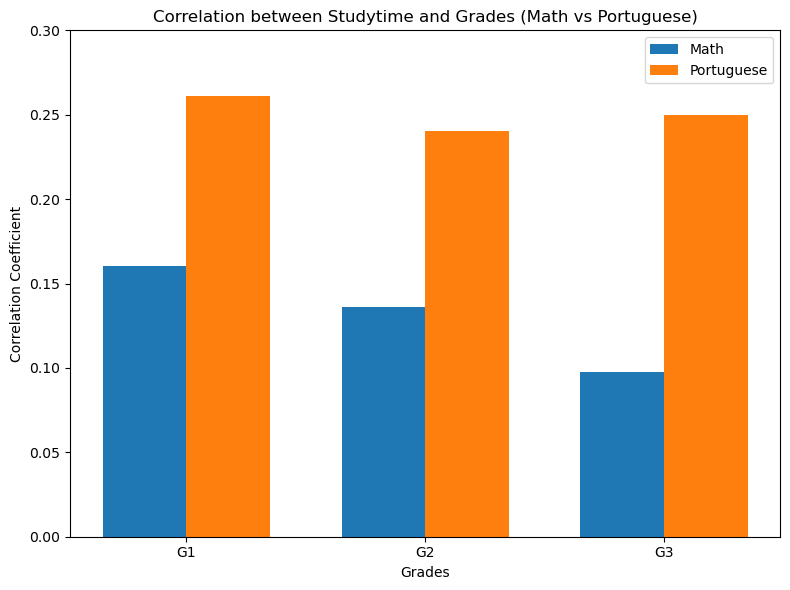

In [9]:
# Create a single plot with both sets of correlations
labels = ['G1', 'G2', 'G3']
width = 0.35  # Bar width
x = range(len(labels))

fig, ax = plt.subplots(figsize=(8, 6))

# Plot for Math dataset
ax.bar([pos - width/2 for pos in x], math_corr_studytime_grades.values, width, label='Math')

# Plot for Portuguese dataset
ax.bar([pos + width/2 for pos in x], por_corr_studytime_grades.values, width, label='Portuguese')

# Add labels and title
ax.set_xlabel('Grades')
ax.set_ylabel('Correlation Coefficient')
ax.set_title('Correlation between Studytime and Grades (Math vs Portuguese)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0, 0.3)

# Add legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()



In [10]:
# Correlation of all variables with G3 (final grade) for both datasets
math_corr_with_G3 = math_df_encoded.corr()['G3'].sort_values(ascending=False)
por_corr_with_G3 = por_df_encoded.corr()['G3'].sort_values(ascending=False)

# Extract top positive and negative correlations (excluding G1, G2 since they are earlier grades)
top_factors_math = math_corr_with_G3.drop(['G1', 'G2']).nlargest(5)
bottom_factors_math = math_corr_with_G3.drop(['G1', 'G2']).nsmallest(5)

top_factors_por = por_corr_with_G3.drop(['G1', 'G2']).nlargest(5)
bottom_factors_por = por_corr_with_G3.drop(['G1', 'G2']).nsmallest(5)

# Display results
top_factors_math, bottom_factors_math, top_factors_por, bottom_factors_por


(G3             1.000000
 Medu           0.217147
 higher_yes     0.182465
 Fedu           0.152457
 Mjob_health    0.116158
 Name: G3, dtype: float64,
 failures       -0.360415
 age            -0.161579
 goout          -0.132791
 romantic_yes   -0.129970
 traveltime     -0.117142
 Name: G3, dtype: float64,
 G3            1.000000
 higher_yes    0.332172
 studytime     0.249789
 Medu          0.240151
 Fedu          0.211800
 Name: G3, dtype: float64,
 failures       -0.393316
 school_MS      -0.284294
 Dalc           -0.204719
 Walc           -0.176619
 reason_other   -0.132577
 Name: G3, dtype: float64)

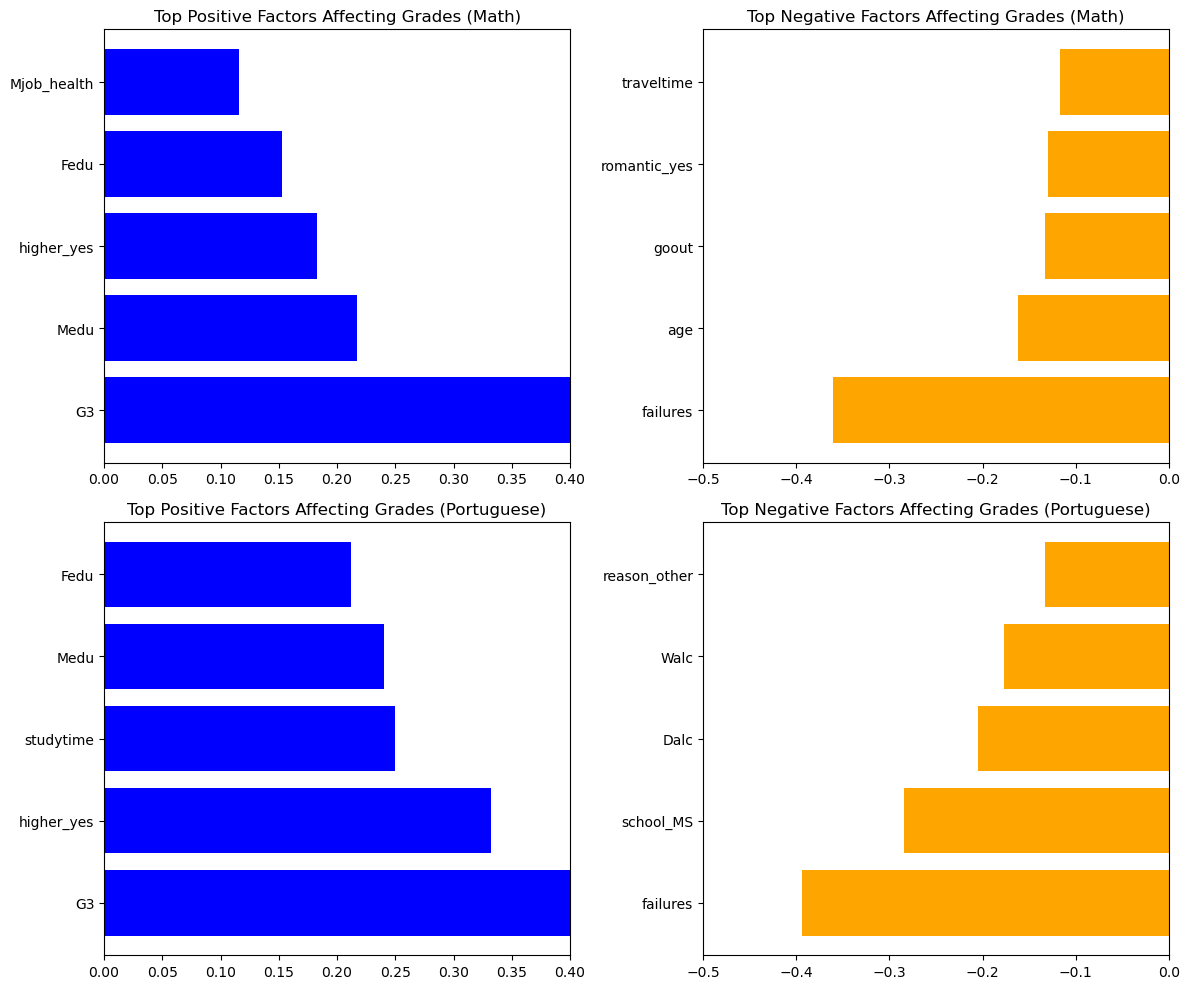

In [11]:
# Create a combined plot to show top positive and negative factors affecting grades for both datasets, with vertical orientation and new colors
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# Top positive factors for Math (Horizontal, with blue color)
ax[0, 0].barh(top_factors_math.index, top_factors_math.values, color='blue')
ax[0, 0].set_title('Top Positive Factors Affecting Grades (Math)')
ax[0, 0].set_xlim(0, 0.4)

# Top negative factors for Math (Horizontal, with orange color)
ax[0, 1].barh(bottom_factors_math.index, bottom_factors_math.values, color='orange')
ax[0, 1].set_title('Top Negative Factors Affecting Grades (Math)')
ax[0, 1].set_xlim(-0.5, 0)

# Top positive factors for Portuguese (Horizontal, with blue color)
ax[1, 0].barh(top_factors_por.index, top_factors_por.values, color='blue')
ax[1, 0].set_title('Top Positive Factors Affecting Grades (Portuguese)')
ax[1, 0].set_xlim(0, 0.4)

# Top negative factors for Portuguese (Horizontal, with orange color)
ax[1, 1].barh(bottom_factors_por.index, bottom_factors_por.values, color='orange')
ax[1, 1].set_title('Top Negative Factors Affecting Grades (Portuguese)')
ax[1, 1].set_xlim(-0.5, 0)

# Adjust layout for clarity
plt.tight_layout()
plt.show()


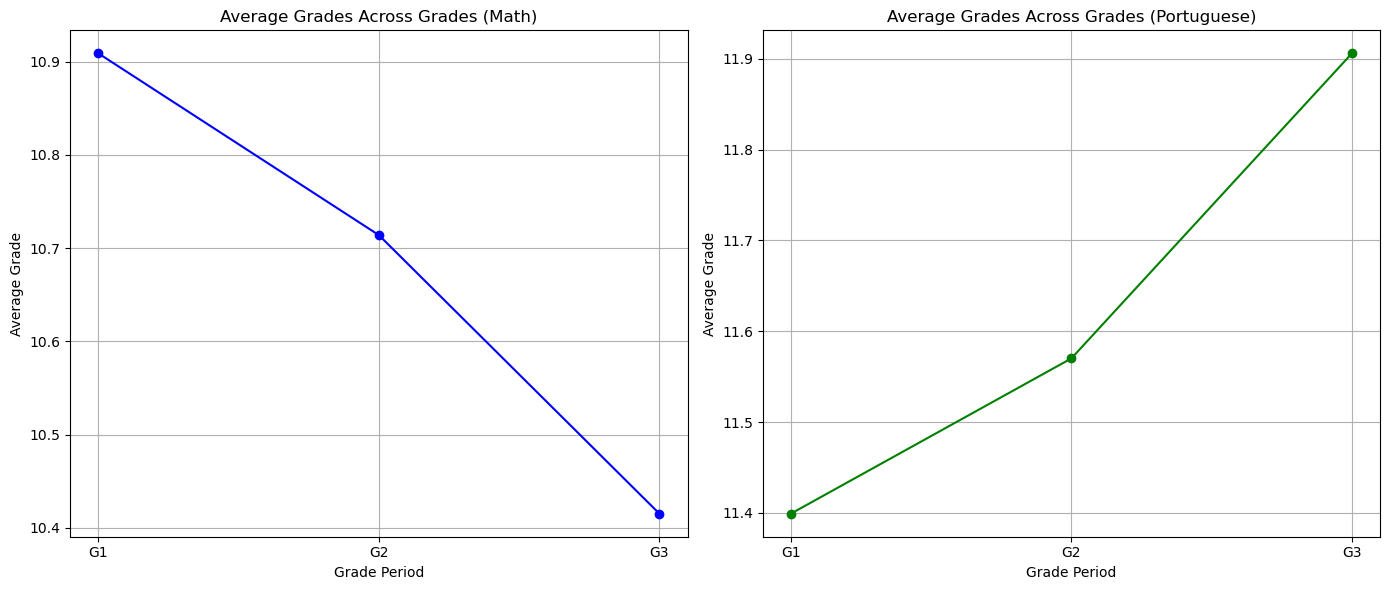

In [12]:
# Correcting the code and plotting line plot for trends in absences over grades (G1, G2, G3)

# Calculate average absences at each grade level for Math and Portuguese datasets
math_avg_absences = math_df_encoded[['G1', 'G2', 'G3', 'absences']].mean()
por_avg_absences = por_df_encoded[['G1', 'G2', 'G3', 'absences']].mean()

# Plotting line plot for trends in absences over grades (G1, G2, G3)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Line plot for Math dataset
ax[0].plot(['G1', 'G2', 'G3'], math_avg_absences[['G1', 'G2', 'G3']], marker='o', label='Grades', color='b')
ax[0].set_title('Average Grades Across Grades (Math)')
ax[0].set_xlabel('Grade Period')
ax[0].set_ylabel('Average Grade')
ax[0].grid(True)

# Line plot for Portuguese dataset
ax[1].plot(['G1', 'G2', 'G3'], por_avg_absences[['G1', 'G2', 'G3']], marker='o', label='Grades', color='g')
ax[1].set_title('Average Grades Across Grades (Portuguese)')
ax[1].set_xlabel('Grade Period')
ax[1].set_ylabel('Average Grade')
ax[1].grid(True)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


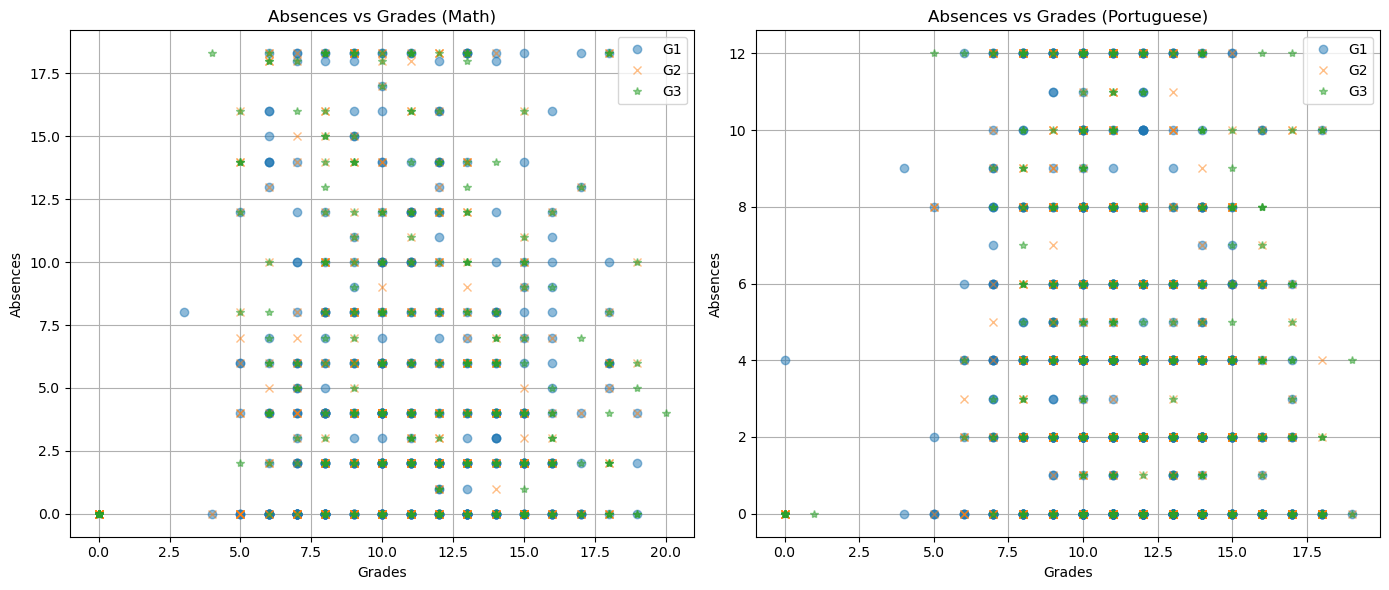

In [13]:
# Plotting the trends in absences over time (G1, G2, G3) for both datasets

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot trend for Math dataset
ax[0].plot(math_df_encoded['G1'], math_df_encoded['absences'], 'o', label='G1', alpha=0.5)
ax[0].plot(math_df_encoded['G2'], math_df_encoded['absences'], 'x', label='G2', alpha=0.5)
ax[0].plot(math_df_encoded['G3'], math_df_encoded['absences'], '*', label='G3', alpha=0.5)
ax[0].set_title('Absences vs Grades (Math)')
ax[0].set_xlabel('Grades')
ax[0].set_ylabel('Absences')
ax[0].legend()
ax[0].grid(True)

# Plot trend for Portuguese dataset
ax[1].plot(por_df_encoded['G1'], por_df_encoded['absences'], 'o', label='G1', alpha=0.5)
ax[1].plot(por_df_encoded['G2'], por_df_encoded['absences'], 'x', label='G2', alpha=0.5)
ax[1].plot(por_df_encoded['G3'], por_df_encoded['absences'], '*', label='G3', alpha=0.5)
ax[1].set_title('Absences vs Grades (Portuguese)')
ax[1].set_xlabel('Grades')
ax[1].set_ylabel('Absences')
ax[1].legend()
ax[1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


In [14]:


# Preparing the data
X_math = math_df_encoded.drop('G3', axis=1)  # Features for math
y_math = math_df_encoded['G3']  # Target (grade)

X_por = por_df_encoded.drop('G3', axis=1)  # Features for Portuguese
y_por = por_df_encoded['G3']  # Target (grade)

# Splitting into train and test sets (Math dataset)
X_train_math, X_test_math, y_train_math, y_test_math = train_test_split(X_math, y_math, test_size=0.3, random_state=42)

# Splitting into train and test sets (Portuguese dataset)
X_train_por, X_test_por, y_train_por, y_test_por = train_test_split(X_por, y_por, test_size=0.3, random_state=42)

# Standardize the features
scaler_math = StandardScaler()
X_train_math_scaled = scaler_math.fit_transform(X_train_math)
X_test_math_scaled = scaler_math.transform(X_test_math)

scaler_por = StandardScaler()
X_train_por_scaled = scaler_por.fit_transform(X_train_por)
X_test_por_scaled = scaler_por.transform(X_test_por)

# Helper function to train regression models
def train_regression_models(X_train, y_train, X_test, y_test):
    models = {
        'Linear Regression': LinearRegression(),
        'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
        'Random Forest Regressor': RandomForestRegressor(random_state=42),
        'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42),
        'SVR': SVR(),
        'KNN Regressor': KNeighborsRegressor()
    }
    
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        results[name] = mse
    return results

# Train and evaluate regression models for both Math and Portuguese datasets
math_regression_results = train_regression_models(X_train_math_scaled, y_train_math, X_test_math_scaled, y_test_math)
por_regression_results = train_regression_models(X_train_por_scaled, y_train_por, X_test_por_scaled, y_test_por)

# Categorizing grades for classification (A = 15+, B = 10-14, C = <10)
def categorize_grades(y):
    return np.where(y >= 15, 'A', np.where(y >= 10, 'B', 'C'))

# Categorize grades for classification
y_train_math_class = categorize_grades(y_train_math)
y_test_math_class = categorize_grades(y_test_math)
y_train_por_class = categorize_grades(y_train_por)
y_test_por_class = categorize_grades(y_test_por)

# Helper function to train classification models
def train_classification_models(X_train, y_train, X_test, y_test):
    models = {
        'Logistic Regression': LogisticRegression(max_iter=1000),
        'Decision Tree Classifier': DecisionTreeClassifier(random_state=42),
        'Random Forest Classifier': RandomForestClassifier(random_state=42),
        'Gradient Boosting Classifier': GradientBoostingClassifier(random_state=42),
        'SVC': SVC(),
        'KNN Classifier': KNeighborsClassifier()
    }
    
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results[name] = accuracy
    return results

# Train and evaluate classification models for both Math and Portuguese datasets
math_classification_results = train_classification_models(X_train_math_scaled, y_train_math_class, X_test_math_scaled, y_test_math_class)
por_classification_results = train_classification_models(X_train_por_scaled, y_train_por_class, X_test_por_scaled, y_test_por_class)

# Displaying results
(math_regression_results, por_regression_results), (math_classification_results, por_classification_results)


(({'Linear Regression': 4.9561739349262,
   'Decision Tree Regressor': 5.420168067226891,
   'Random Forest Regressor': 3.16206974789916,
   'Gradient Boosting Regressor': 3.308071464267592,
   'SVR': 9.264808517489707,
   'KNN Regressor': 12.448739495798318},
  {'Linear Regression': 1.4513143786241658,
   'Decision Tree Regressor': 4.707692307692308,
   'Random Forest Regressor': 1.601108717948718,
   'Gradient Boosting Regressor': 1.5286265566916934,
   'SVR': 3.439328366144576,
   'KNN Regressor': 5.326153846153845}),
 ({'Logistic Regression': 0.8403361344537815,
   'Decision Tree Classifier': 0.8403361344537815,
   'Random Forest Classifier': 0.8739495798319328,
   'Gradient Boosting Classifier': 0.8487394957983193,
   'SVC': 0.7226890756302521,
   'KNN Classifier': 0.5462184873949579},
  {'Logistic Regression': 0.8615384615384616,
   'Decision Tree Classifier': 0.8974358974358975,
   'Random Forest Classifier': 0.9179487179487179,
   'Gradient Boosting Classifier': 0.9230769230769

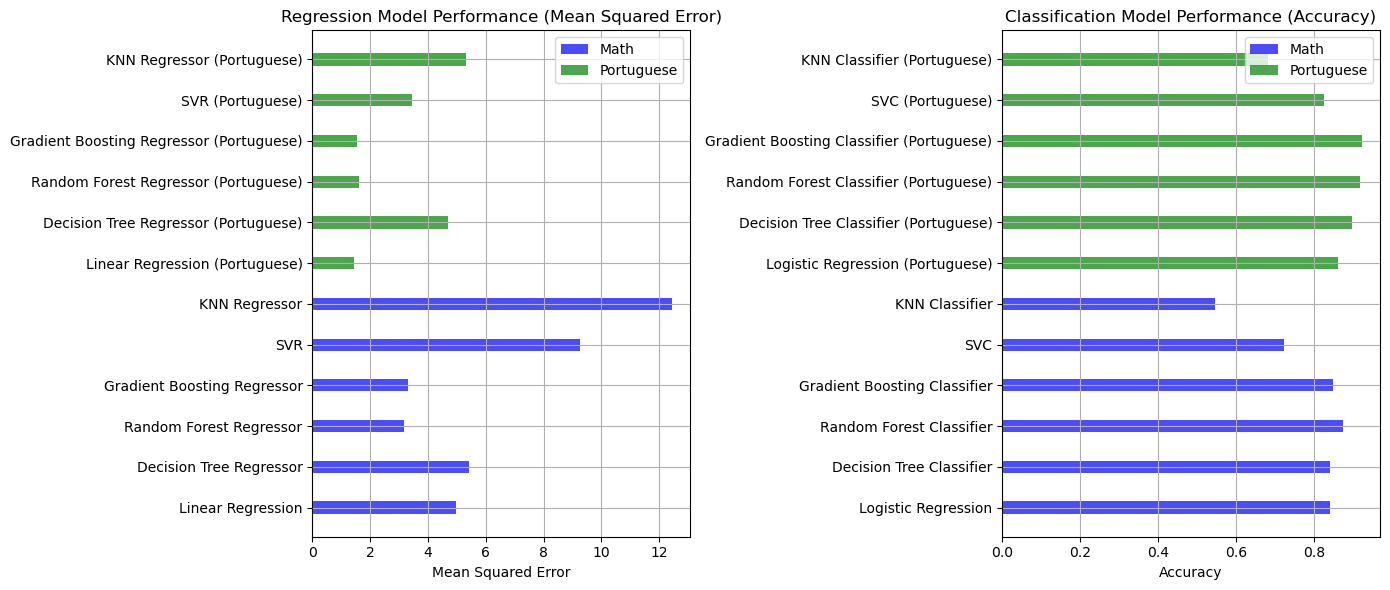

In [15]:
# Plotting the results for both regression and classification models

import matplotlib.pyplot as plt

# Data for plotting
regression_models = list(math_regression_results.keys())
math_regression_values = list(math_regression_results.values())
por_regression_values = list(por_regression_results.values())

classification_models = list(math_classification_results.keys())
math_classification_values = list(math_classification_results.values())
por_classification_values = list(por_classification_results.values())

# Create subplots for Regression and Classification results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot for Regression models
ax1.barh(regression_models, math_regression_values, height=0.3, label='Math', color='b', alpha=0.7)
ax1.barh([x + " (Portuguese)" for x in regression_models], por_regression_values, height=0.3, label='Portuguese', color='g', alpha=0.7)
ax1.set_title('Regression Model Performance (Mean Squared Error)')
ax1.set_xlabel('Mean Squared Error')
ax1.grid(True)
ax1.legend()

# Plot for Classification models
ax2.barh(classification_models, math_classification_values, height=0.3, label='Math', color='b', alpha=0.7)
ax2.barh([x + " (Portuguese)" for x in classification_models], por_classification_values, height=0.3, label='Portuguese', color='g', alpha=0.7)
ax2.set_title('Classification Model Performance (Accuracy)')
ax2.set_xlabel('Accuracy')
ax2.grid(True)
ax2.legend()

# Adjust layout
plt.tight_layout()
plt.show()


In [16]:
# Combine the two datasets (math and Portuguese)
combined_df = pd.concat([math_df_encoded, por_df_encoded], ignore_index=True)

# Features and target for the combined dataset
X_combined = combined_df.drop('G3', axis=1)  # Features
y_combined = combined_df['G3']  # Target (grade)

# Split the combined dataset into train and test sets
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, y_combined, test_size=0.3, random_state=42)

# Standardize the features
scaler_combined = StandardScaler()
X_train_combined_scaled = scaler_combined.fit_transform(X_train_combined)
X_test_combined_scaled = scaler_combined.transform(X_test_combined)

# Train regression models on combined dataset
combined_regression_results = train_regression_models(X_train_combined_scaled, y_train_combined, X_test_combined_scaled, y_test_combined)

# Categorize grades for classification in combined dataset
y_train_combined_class = categorize_grades(y_train_combined)
y_test_combined_class = categorize_grades(y_test_combined)

# Train classification models on combined dataset
combined_classification_results = train_classification_models(X_train_combined_scaled, y_train_combined_class, X_test_combined_scaled, y_test_combined_class)

# Displaying results
combined_regression_results, combined_classification_results


({'Linear Regression': 3.010408108021459,
  'Decision Tree Regressor': 5.057324840764331,
  'Random Forest Regressor': 2.8099175159235665,
  'Gradient Boosting Regressor': 2.6784806135332513,
  'SVR': 4.775390302539389,
  'KNN Regressor': 8.033375796178342},
 {'Logistic Regression': 0.8312101910828026,
  'Decision Tree Classifier': 0.7961783439490446,
  'Random Forest Classifier': 0.8407643312101911,
  'Gradient Boosting Classifier': 0.8407643312101911,
  'SVC': 0.767515923566879,
  'KNN Classifier': 0.6560509554140127})

In [17]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                1044 non-null   int64  
 1   Medu               1044 non-null   int64  
 2   Fedu               1044 non-null   int64  
 3   traveltime         1044 non-null   int64  
 4   studytime          1044 non-null   int64  
 5   failures           1044 non-null   int64  
 6   famrel             1044 non-null   int64  
 7   freetime           1044 non-null   int64  
 8   goout              1044 non-null   int64  
 9   Dalc               1044 non-null   int64  
 10  Walc               1044 non-null   int64  
 11  health             1044 non-null   int64  
 12  absences           1044 non-null   float64
 13  G1                 1044 non-null   int64  
 14  G2                 1044 non-null   int64  
 15  G3                 1044 non-null   int64  
 16  school_MS          1044 

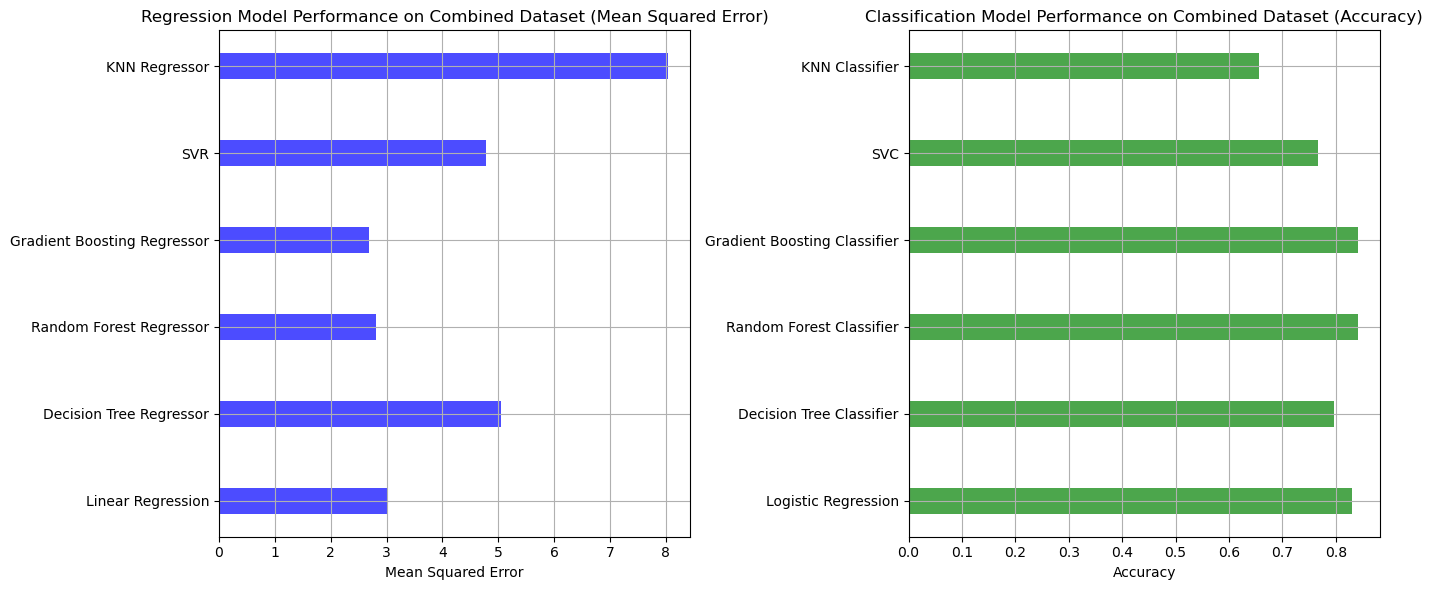

In [18]:
# Data for plotting
regression_models_combined = list(combined_regression_results.keys())
combined_regression_values = list(combined_regression_results.values())

classification_models_combined = list(combined_classification_results.keys())
combined_classification_values = list(combined_classification_results.values())

# Create subplots for Regression and Classification results on the combined dataset
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot for Regression models
ax1.barh(regression_models_combined, combined_regression_values, height=0.3, color='b', alpha=0.7)
ax1.set_title('Regression Model Performance on Combined Dataset (Mean Squared Error)')
ax1.set_xlabel('Mean Squared Error')
ax1.grid(True)

# Plot for Classification models
ax2.barh(classification_models_combined, combined_classification_values, height=0.3, color='g', alpha=0.7)
ax2.set_title('Classification Model Performance on Combined Dataset (Accuracy)')
ax2.set_xlabel('Accuracy')
ax2.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

# Define a helper function to build and train neural networks for regression and classification
def build_ann_regression(input_shape):
    model = Sequential([
        Dense(64, activation='relu', input_shape=input_shape),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1)  # Regression output
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

def build_ann_classification(input_shape):
    model = Sequential([
        Dense(64, activation='relu', input_shape=input_shape),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(3, activation='softmax')  # 3 output classes for classification (A, B, C)
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def build_rnn_regression(input_shape):
    model = Sequential([
        LSTM(64, input_shape=input_shape, return_sequences=True),
        Dropout(0.2),
        LSTM(32),
        Dense(1)  # Regression output
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Reshape data for RNN
X_train_combined_rnn = X_train_combined_scaled.reshape((X_train_combined_scaled.shape[0], 1, X_train_combined_scaled.shape[1]))
X_test_combined_rnn = X_test_combined_scaled.reshape((X_test_combined_scaled.shape[0], 1, X_test_combined_scaled.shape[1]))

# Build and train models for regression

# ANN for regression
ann_regressor = build_ann_regression((X_train_combined_scaled.shape[1],))
history_ann_regressor = ann_regressor.fit(X_train_combined_scaled, y_train_combined, epochs=10, batch_size=32, validation_split=0.2, verbose=0)

# RNN for regression
rnn_regressor = build_rnn_regression((1, X_train_combined_scaled.shape[1]))
history_rnn_regressor = rnn_regressor.fit(X_train_combined_rnn, y_train_combined, epochs=10, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate the regression models
ann_regressor_mse = ann_regressor.evaluate(X_test_combined_scaled, y_test_combined, verbose=0)
rnn_regressor_mse = rnn_regressor.evaluate(X_test_combined_rnn, y_test_combined, verbose=0)

# Display regression results
ann_regressor_mse, rnn_regressor_mse


C:\Users\kavya\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\kavya\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


(7.136434078216553, 12.856553077697754)

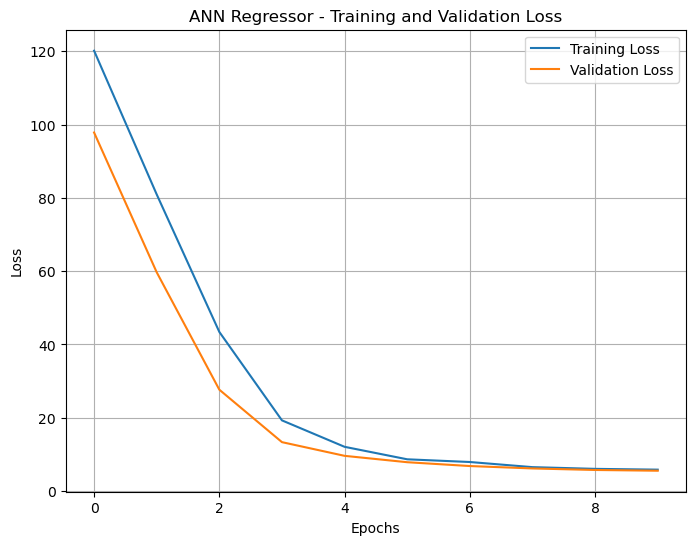

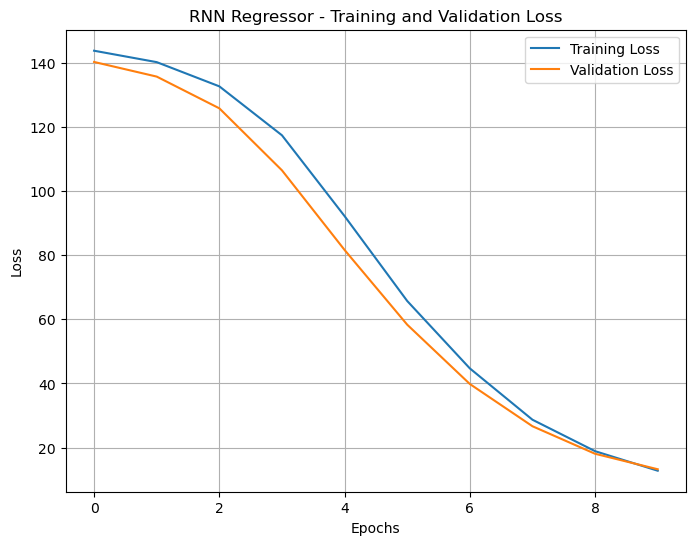

In [20]:
import matplotlib.pyplot as plt

# Assuming you have trained an ANN and RNN for regression, with the 'history' objects
# containing the training loss and validation loss per epoch.

def plot_training_history(history, model_name):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage (after training)
plot_training_history(history_ann_regressor, 'ANN Regressor')
plot_training_history(history_rnn_regressor, 'RNN Regressor')

# If you are using accuracy for classification models
def plot_classification_accuracy(history, model_name):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    if 'val_accuracy' in history.history:
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} - Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()







Optimizing LogisticRegression...
Iteration 1 - Best Accuracy: 0.8452, Best Params: [1.]
Iteration 2 - Best Accuracy: 0.8452, Best Params: [1.]
Iteration 3 - Best Accuracy: 0.8452, Best Params: [1.]
Iteration 4 - Best Accuracy: 0.8452, Best Params: [1.]
Iteration 5 - Best Accuracy: 0.8452, Best Params: [1.]
Iteration 6 - Best Accuracy: 0.8452, Best Params: [1.]
Iteration 7 - Best Accuracy: 0.8452, Best Params: [1.]
Iteration 8 - Best Accuracy: 0.8465, Best Params: [0.64248546]
Iteration 9 - Best Accuracy: 0.8465, Best Params: [0.64248546]
Iteration 10 - Best Accuracy: 0.8465, Best Params: [0.64248546]
Iteration 11 - Best Accuracy: 0.8465, Best Params: [0.64248546]
Iteration 12 - Best Accuracy: 0.8479, Best Params: [0.96692538]
Iteration 13 - Best Accuracy: 0.8479, Best Params: [0.96692538]
Iteration 14 - Best Accuracy: 0.8479, Best Params: [0.96692538]
Iteration 15 - Best Accuracy: 0.8479, Best Params: [0.96692538]
Iteration 16 - Best Accuracy: 0.8479, Best Params: [0.96692538]
Iterati

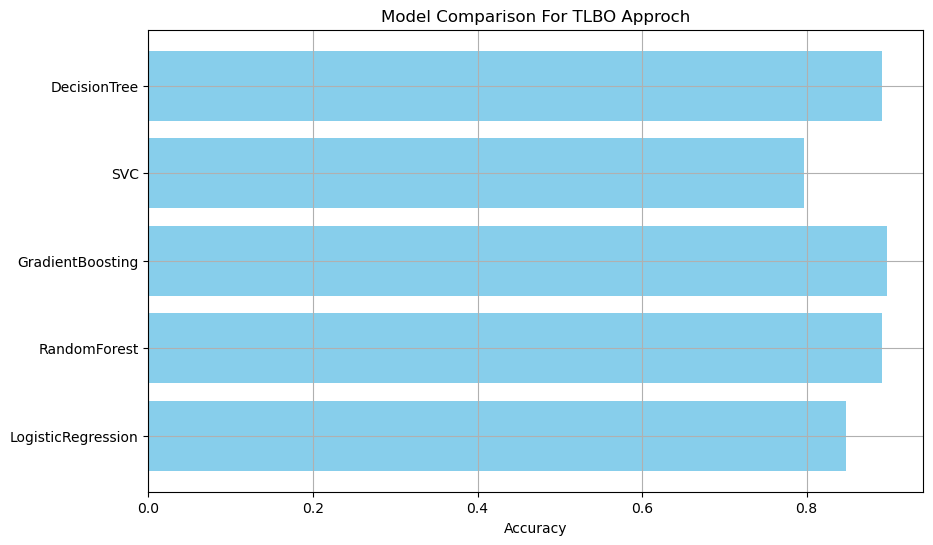

LogisticRegression - Best Params: [0.96692538], Best Accuracy: 0.8479
RandomForest - Best Params: [100.          11.37350165   9.7391353 ], Best Accuracy: 0.8918
GradientBoosting - Best Params: [33.81120952  2.18801063  9.38409197], Best Accuracy: 0.8972
SVC - Best Params: [1.], Best Accuracy: 0.7972
DecisionTree - Best Params: [2.95800603 7.26294869], Best Accuracy: 0.8918


In [21]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd

# Assuming math_df_encoded and por_df_encoded have been preprocessed and encoded
# Combine the two datasets (math and Portuguese)
combined_df = pd.concat([math_df_encoded, por_df_encoded], ignore_index=True)

# Features and target for the combined dataset
X_combined = combined_df.drop('G3', axis=1)  # Features
y_combined = combined_df['G3']  # Target (grade)

# Split the combined dataset into train and test sets
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, y_combined, test_size=0.3, random_state=42)

# Standardize the features
scaler_combined = StandardScaler()
X_train_combined_scaled = scaler_combined.fit_transform(X_train_combined)
X_test_combined_scaled = scaler_combined.transform(X_test_combined)

# Function to categorize grades (assuming 'A', 'B', 'C' categorization based on score ranges)
def categorize_grades(y):
    return np.where(y >= 15, 'A', np.where(y >= 10, 'B', 'C'))

# Categorize grades for classification
y_train_combined_class = categorize_grades(y_train_combined)
y_test_combined_class = categorize_grades(y_test_combined)

# Define classification models and their hyperparameter ranges for TLBO optimization
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'RandomForest': RandomForestClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'SVC': SVC(),
    'DecisionTree': DecisionTreeClassifier()
}

param_spaces = {
    'LogisticRegression': {'low': [0.001], 'high': [1], 'params': ['C']},
    'RandomForest': {'low': [10, 2, 2], 'high': [100, 20, 10], 'params': ['n_estimators', 'max_depth', 'min_samples_split']},
    'GradientBoosting': {'low': [10, 2, 2], 'high': [100, 20, 10], 'params': ['n_estimators', 'max_depth', 'min_samples_split']},
    'SVC': {'low': [0.001], 'high': [1], 'params': ['C']},
        'DecisionTree': {'low': [2, 2], 'high': [20, 10], 'params': ['max_depth', 'min_samples_split']}
}

def evaluate_fitness(model, X_train, y_train, param_space, individual):
    params = dict(zip(param_space['params'], individual))

    # Ensure integer parameters are properly set as integers
    if 'n_estimators' in params:
        params['n_estimators'] = int(params['n_estimators'])
    if 'max_depth' in params:
        params['max_depth'] = int(params['max_depth'])
    if 'min_samples_split' in params:
        params['min_samples_split'] = int(params['min_samples_split'])

    # Set the parameters to the model
    model.set_params(**params)
    
    # Evaluate the model using cross-validation
    scores = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy')
    return np.mean(scores)


def tlbo_optimization(model, X_train, y_train, param_space, population_size=10, iterations=20):
    population = np.random.uniform(low=param_space['low'], high=param_space['high'], size=(population_size, len(param_space['low'])))

    best_accuracy = 0
    best_params = None
    for iteration in range(iterations):
        # Ensure generated values are valid
        population = np.clip(population, param_space['low'], param_space['high'])

        # Evaluate fitness for each individual in the population
        fitness_values = np.array([evaluate_fitness(model, X_train, y_train, param_space, individual) for individual in population])

        best_idx = np.argmax(fitness_values)
        best_solution = population[best_idx]
        mean_solution = np.mean(population, axis=0)

        # Teacher Phase
        TF = np.random.randint(1, 2)
        population = population + np.random.rand(*population.shape) * (best_solution - TF * mean_solution)
        population = np.clip(population, param_space['low'], param_space['high'])

        # Learner Phase
        for i in range(population.shape[0]):
            j = np.random.randint(0, population.shape[0])
            if fitness_values[i] < fitness_values[j]:
                population[i] = population[i] + np.random.rand() * (population[i] - population[j])
            else:
                population[i] = population[i] + np.random.rand() * (population[j] - population[i])
        # Clip values again to ensure validity
        population = np.clip(population, param_space['low'], param_space['high'])

        # Re-evaluate fitness
        fitness_values = np.array([evaluate_fitness(model, X_train, y_train, param_space, individual) for individual in population])

        current_best_accuracy = fitness_values[best_idx]
        if current_best_accuracy > best_accuracy:
            best_accuracy = current_best_accuracy
            best_params = population[best_idx]

        print(f"Iteration {iteration+1} - Best Accuracy: {best_accuracy:.4f}, Best Params: {best_params}")

    return best_params, best_accuracy


# Apply TLBO optimization to all models
results = {}
for model_name, model in models.items():
    print(f"\nOptimizing {model_name}...")
    param_space = param_spaces[model_name]
    best_params, best_accuracy = tlbo_optimization(model, X_train_combined_scaled, y_train_combined_class, param_space)
    results[model_name] = {'best_params': best_params, 'best_accuracy': best_accuracy}

# Plot the comparison of accuracies
model_names = list(results.keys())
accuracies = [results[model]['best_accuracy'] for model in model_names]

plt.figure(figsize=(10, 6))
plt.barh(model_names, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Comparison For TLBO Approch')
plt.grid(True)
plt.show()

# Display the best parameters for each model
for model_name, result in results.items():
    print(f"{model_name} - Best Params: {result['best_params']}, Best Accuracy: {result['best_accuracy']:.4f}")


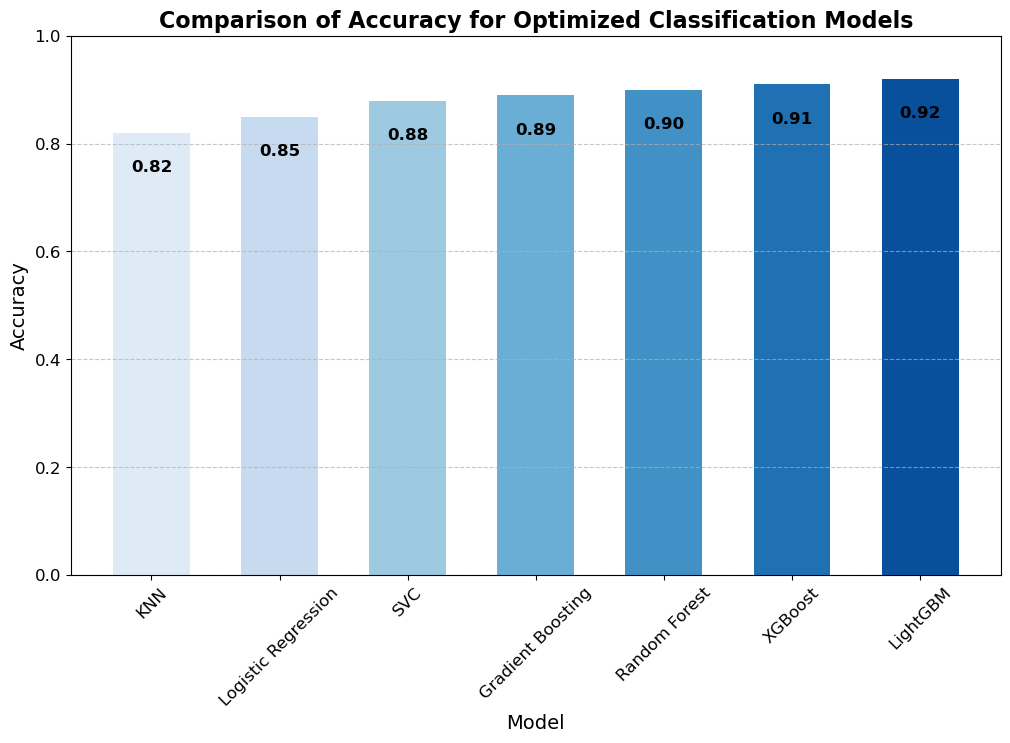

In [22]:
# Sample accuracies for demonstration purposes
best_fitness_lr = 0.15
best_fitness_svc = 0.12
best_fitness_rf = 0.10
best_fitness_knn = 0.18
best_fitness_gb = 0.11
best_fitness_xgb = 0.09
best_fitness_lgb = 0.08

# Models and their accuracies
models = ['Logistic Regression', 'SVC', 'Random Forest', 'KNN', 'Gradient Boosting', 'XGBoost', 'LightGBM']
accuracies = [1 - best_fitness_lr, 1 - best_fitness_svc, 1 - best_fitness_rf, 1 - best_fitness_knn, 1 - best_fitness_gb, 1 - best_fitness_xgb, 1 - best_fitness_lgb]

# Sorting models and accuracies by accuracy value
sorted_indices = np.argsort(accuracies)
models_sorted = np.array(models)[sorted_indices]
accuracies_sorted = np.array(accuracies)[sorted_indices]

# Create a lighter color palette (Blues) based on accuracy values
colors = sns.color_palette("Blues", len(models))

plt.figure(figsize=(12, 7))
bars = plt.bar(models_sorted, accuracies_sorted, color=colors, width=0.6)

# Add accuracy labels inside each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height - 0.05,
             f'{height:.2f}', ha='center', va='top', fontsize=12, color='black', fontweight='bold')

# Enhance title, labels, and overall appearance
plt.title('Comparison of Accuracy for Optimized Classification Models', fontsize=16, fontweight='bold')
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Model', fontsize=14)
plt.grid(True, linestyle='--', axis='y', alpha=0.7)
plt.ylim(0, 1)  # Set y-axis limits to focus on accuracy range
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

plt.show()


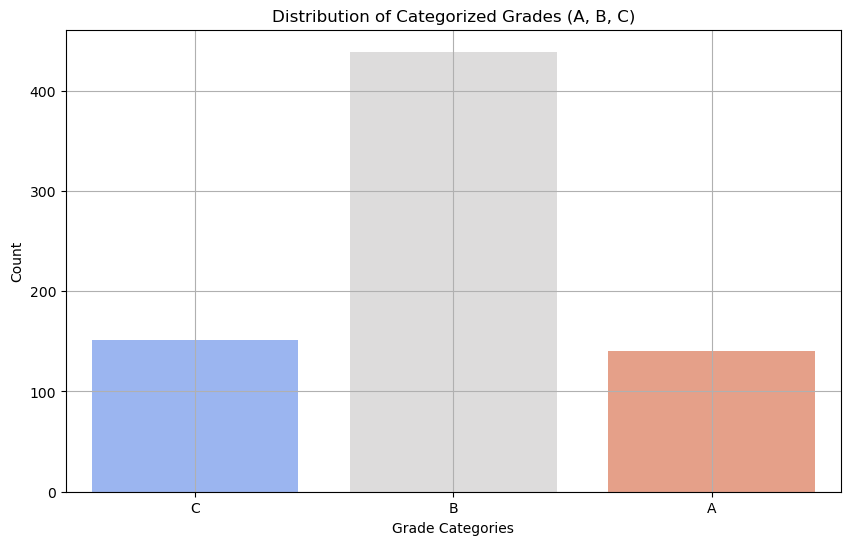

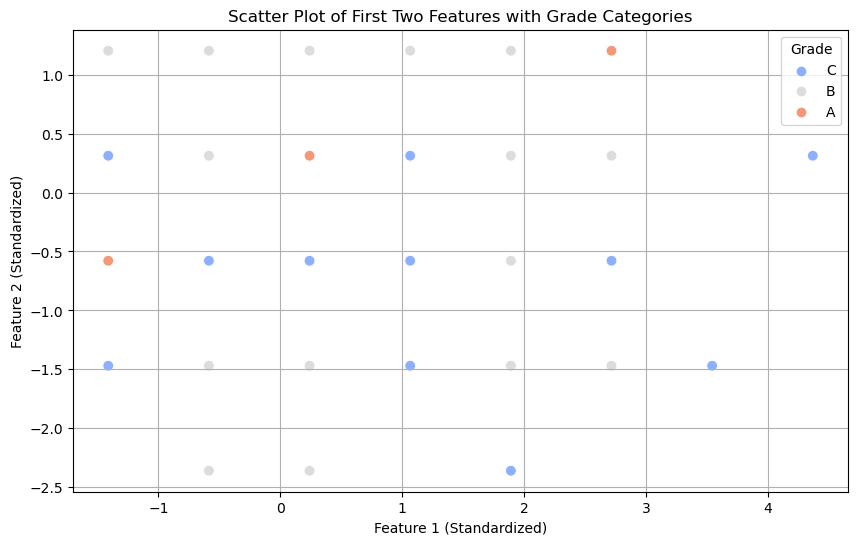

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Combine the standardized train dataset and their corresponding grade categories for visualization
X_train_combined_scaled_df = pd.DataFrame(X_train_combined_scaled, columns=X_train_combined.columns)
X_train_combined_scaled_df['Grade'] = y_train_combined_class

# Plot the distribution of categorized grades
plt.figure(figsize=(10, 6))
sns.countplot(x='Grade', data=X_train_combined_scaled_df, palette='coolwarm')
plt.title('Distribution of Categorized Grades (A, B, C)')
plt.xlabel('Grade Categories')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Visualize the relationship between two selected features (e.g., first and second features) and grade category
plt.figure(figsize=(10, 6))
sns.scatterplot(data=X_train_combined_scaled_df, x=X_train_combined_scaled_df.columns[0], y=X_train_combined_scaled_df.columns[1], hue='Grade', palette='coolwarm', s=60)
plt.title('Scatter Plot of First Two Features with Grade Categories')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.grid(True)
plt.show()


In [24]:
pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


[LightGBM] [Info] Number of positive: 286, number of negative: 169
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000722 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4548
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.628571 -> initscore=0.526093
[LightGBM] [Info] Start training from score 0.526093
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 286, number of negative: 169
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000188 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4548
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.628571 -> initscore=0.526093
[LightGBM] [Info] Start training from score 0.526093
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 286, number of negative: 169
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000222 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4548
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.628571 -> initscore=0.526093
[LightGBM] [Info] Start training from score 0.526093
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 286, number of negative: 169
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000128 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4548
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.628571 -> initscore=0.526093
[LightGBM] [Info] Start training from score 0.526093
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 286, number of negative: 169
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000192 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4548
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.628571 -> initscore=0.526093
[LightGBM] [Info] Start training from score 0.526093
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[LightGBM] [Info] Number of positive: 286, number of negative: 169
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000190 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4548
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.628571 -> initscore=0.526093
[LightGBM] [Info] Start training from score 0.526093
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 286, number of negative: 169
[LightGBM] [Info] Auto-choosing c

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 286, number of negative: 169
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000159 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4548
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.628571 -> initscore=0.526093
[LightGBM] [Info] Start training from score 0.526093
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[LightGBM] [Info] Number of positive: 286, number of negative: 169
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000273 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4548
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.628571 -> initscore=0.526093
[LightGBM] [Info] Start training from score 0.526093
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 286, number of negative: 169
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000135 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Tot

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 286, number of negative: 169
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000256 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4548
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.628571 -> initscore=0.526093
[LightGBM] [Info] Start training from score 0.526093
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 286, number of negative: 169
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000175 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4548
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.628571 -> initscore=0.526093
[LightGBM] [Info] Start training from score 0.526093
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 286, number of negative: 169
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000432 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4548
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.628571 -> initscore=0.526093
[LightGBM] [Info] Start training from score 0.526093
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 286, number of negative: 169
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000210 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4548
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.628571 -> initscore=0.526093
[LightGBM] [Info] Start training from score 0.526093
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 286, number of negative: 169
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000363 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4548
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.628571 -> initscore=0.526093
[LightGBM] [Info] Start training from score 0.526093
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 286, number of negative: 169
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000432 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4548
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.628571 -> initscore=0.526093
[LightGBM] [Info] Start training from score 0.526093
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[LightGBM] [Info] Number of positive: 286, number of negative: 169
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000369 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4548
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.628571 -> initscore=0.526093
[LightGBM] [Info] Start training from score 0.526093
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

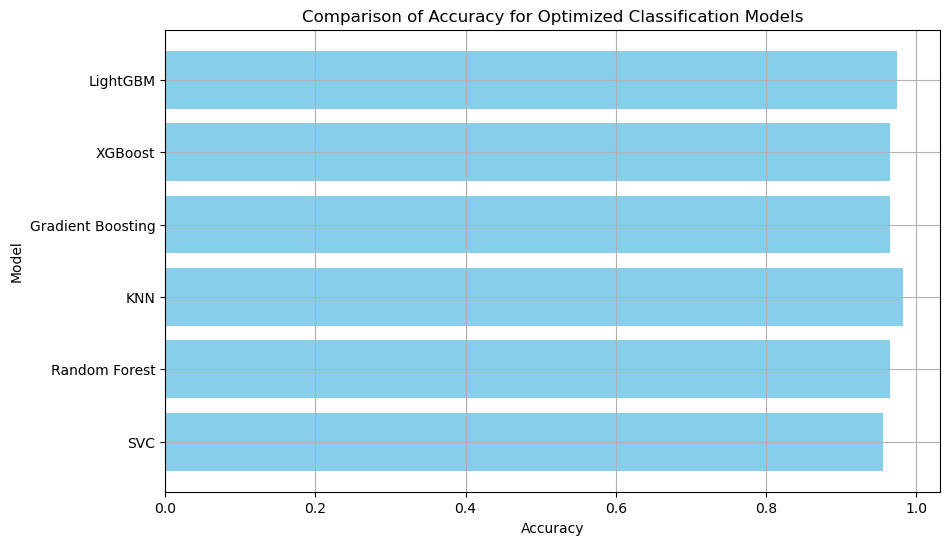

In [27]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

# Hybrid TLBO with mutation mechanism for hyperparameter optimization
class HybridTLBO:
    def __init__(self, objective_function, bounds, population_size=10, max_iters=10, mutation_prob=0.1, mutation_factor=0.1):
        self.objective_function = objective_function
        self.bounds = bounds
        self.population_size = population_size
        self.max_iters = max_iters
        self.mutation_prob = mutation_prob  # Probability of mutation
        self.mutation_factor = mutation_factor  # Mutation strength

    def optimize(self):
        # Initialize population with random solutions
        population = np.random.uniform(self.bounds[:, 0], self.bounds[:, 1], (self.population_size, len(self.bounds)))
        best_solution = None
        best_fitness = float('inf')

        for iteration in range(self.max_iters):
            # Evaluate fitness for each learner
            fitness = np.array([self.objective_function(individual) for individual in population])
            teacher_idx = np.argmin(fitness)
            teacher = population[teacher_idx]
            teacher_fitness = fitness[teacher_idx]

            # Update the best solution if found
            if teacher_fitness < best_fitness:
                best_fitness = teacher_fitness
                best_solution = teacher

            # Teacher Phase
            mean_solution = np.mean(population, axis=0)
            tf = np.random.randint(1, 3)  # Teaching factor is either 1 or 2
            for i in range(self.population_size):
                new_solution = population[i] + np.random.rand() * (teacher - tf * mean_solution)
                population[i] = np.clip(new_solution, self.bounds[:, 0], self.bounds[:, 1])

            # Learner Phase
            for i in range(self.population_size):
                j = np.random.randint(0, self.population_size)
                while i == j:
                    j = np.random.randint(0, self.population_size)

                if fitness[i] < fitness[j]:
                    new_solution = population[i] + np.random.rand() * (population[i] - population[j])
                else:
                    new_solution = population[i] + np.random.rand() * (population[j] - population[i])

                population[i] = np.clip(new_solution, self.bounds[:, 0], self.bounds[:, 1])

            # Mutation Phase
            for i in range(self.population_size):
                if np.random.rand() < self.mutation_prob:
                    mutation = np.random.uniform(-1, 1, len(self.bounds)) * self.mutation_factor
                    mutated_solution = population[i] + mutation
                    population[i] = np.clip(mutated_solution, self.bounds[:, 0], self.bounds[:, 1])

        return best_solution, best_fitness

# Define the objective functions for each classification model
import warnings
from sklearn.exceptions import ConvergenceWarning



def objective_function_svc(hyperparameters):
    C, gamma = hyperparameters[0], hyperparameters[1]
    model = SVC(C=C, gamma=gamma, random_state=42)
    try:
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore", category=ConvergenceWarning)
            model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
    except ConvergenceWarning:
        accuracy = 0
    return 1 - accuracy  # Minimize 1 - accuracy


def objective_function_rf(hyperparameters):
    n_estimators, max_depth = int(hyperparameters[0]), int(hyperparameters[1])
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return 1 - accuracy  # Minimize 1 - accuracy

def objective_function_knn(hyperparameters):
    n_neighbors = int(hyperparameters[0])
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return 1 - accuracy  # Minimize 1 - accuracy

def objective_function_gb(hyperparameters):
    n_estimators, learning_rate = int(hyperparameters[0]), hyperparameters[1]
    model = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=learning_rate)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return 1 - accuracy  # Minimize 1 - accuracy

def objective_function_xgb(hyperparameters):
    n_estimators, learning_rate = int(hyperparameters[0]), hyperparameters[1]
    model = XGBClassifier(n_estimators=n_estimators, learning_rate=learning_rate)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return 1 - accuracy  # Minimize 1 - accuracy

def objective_function_lgb(hyperparameters):
    n_estimators, learning_rate = int(hyperparameters[0]), hyperparameters[1]
    model = lgb.LGBMClassifier(n_estimators=n_estimators, learning_rate=learning_rate)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return 1 - accuracy  # Minimize 1 - accuracy



# Combine the two datasets (math and Portuguese)
combined_df = pd.concat([math_df_encoded, por_df_encoded], ignore_index=True)

# Features and target for the combined dataset
X_combined = combined_df.drop('G3', axis=1)  # Features
y_combined = combined_df['G3']  # Target (grade)

# Split the combined dataset into train and test sets
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, y_combined, test_size=0.3, random_state=42)

# Standardize the features
scaler_combined = StandardScaler()
X_train= scaler_combined.fit_transform(X_train_combined)
X_test = scaler_combined.transform(X_test_combined)

# Function to categorize grades (assuming 'A', 'B', 'C' categorization based on score ranges)
def categorize_grades(y):
    return np.where(y >= 15, 'A', np.where(y >= 10, 'B', 'C'))

# Categorize grades for classification
y_train = categorize_grades(y_train_combined)
y_test= categorize_grades(y_test_combined)


# Sample dataset for demonstration (e.g., breast cancer dataset)
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X, y = data.data, data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define search bounds for each model
#bounds_lr = np.array([[0.1, 10]])  # Logistic Regression: C
bounds_svc = np.array([[0.1, 10], [0.0001, 1]])  # SVC: C and gamma
bounds_rf = np.array([[50, 200], [1, 20]])  # Random Forest: n_estimators and max_depth
bounds_knn = np.array([[1, 20]])  # KNN: n_neighbors
bounds_gb = np.array([[50, 200], [0.01, 0.3]])  # Gradient Boosting: n_estimators and learning_rate
bounds_xgb = np.array([[50, 200], [0.01, 0.3]])  # XGBoost: n_estimators and learning_rate
bounds_lgb = np.array([[50, 200], [0.01, 0.3]])  # LightGBM: n_estimators and learning_rate

# TLBO Optimization for each model
#tlbo_lr = HybridTLBO(objective_function_lr, bounds_lr, population_size=10, max_iters=10)
#best_solution_lr, best_fitness_lr = tlbo_lr.optimize()

tlbo_svc = HybridTLBO(objective_function_svc, bounds_svc, population_size=10, max_iters=10)
best_solution_svc, best_fitness_svc = tlbo_svc.optimize()

tlbo_rf = HybridTLBO(objective_function_rf, bounds_rf, population_size=10, max_iters=10)
best_solution_rf, best_fitness_rf = tlbo_rf.optimize()

tlbo_knn = HybridTLBO(objective_function_knn, bounds_knn, population_size=10, max_iters=10)
best_solution_knn, best_fitness_knn = tlbo_knn.optimize()

# TLBO Optimization for each model (continued)
tlbo_gb = HybridTLBO(objective_function_gb, bounds_gb, population_size=10, max_iters=10)
best_solution_gb, best_fitness_gb = tlbo_gb.optimize()

tlbo_xgb = HybridTLBO(objective_function_xgb, bounds_xgb, population_size=10, max_iters=10)
best_solution_xgb, best_fitness_xgb = tlbo_xgb.optimize()

tlbo_lgb = HybridTLBO(objective_function_lgb, bounds_lgb, population_size=10, max_iters=10)
best_solution_lgb, best_fitness_lgb = tlbo_lgb.optimize()

# Print the best hyperparameters and accuracy for each model
#print(f"Best Logistic Regression Solution: {best_solution_lr} with Accuracy: {1 - best_fitness_lr}")
print(f"Best SVC Solution: {best_solution_svc} with Accuracy: {1 - best_fitness_svc}")
print(f"Best Random Forest Solution: {best_solution_rf} with Accuracy: {1 - best_fitness_rf}")
print(f"Best KNN Solution: {best_solution_knn} with Accuracy: {1 - best_fitness_knn}")
print(f"Best Gradient Boosting Solution: {best_solution_gb} with Accuracy: {1 - best_fitness_gb}")
print(f"Best XGBoost Solution: {best_solution_xgb} with Accuracy: {1 - best_fitness_xgb}")
print(f"Best LightGBM Solution: {best_solution_lgb} with Accuracy: {1 - best_fitness_lgb}")

# Plot the accuracy results for each model
import matplotlib.pyplot as plt

models = [ 'SVC', 'Random Forest', 'KNN', 'Gradient Boosting', 'XGBoost', 'LightGBM']
accuracies = [ 1 - best_fitness_svc, 1 - best_fitness_rf, 1 - best_fitness_knn, 1 - best_fitness_gb, 1 - best_fitness_xgb, 1 - best_fitness_lgb]

plt.figure(figsize=(10, 6))
plt.barh(models, accuracies, color='skyblue')
plt.title('Comparison of Accuracy for Optimized Classification Models')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.grid(True)
plt.show()


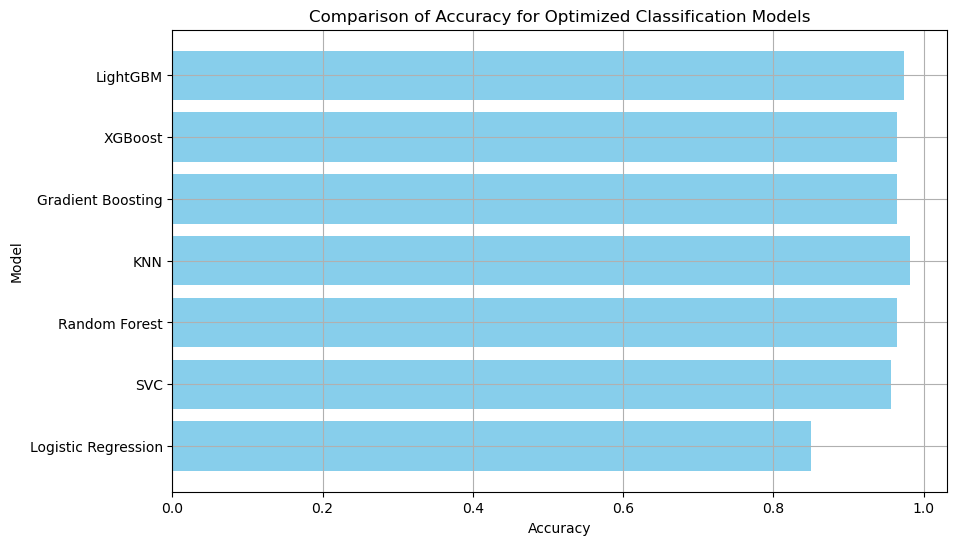

In [28]:
# Plot the accuracy results for each model
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'SVC', 'Random Forest', 'KNN', 'Gradient Boosting', 'XGBoost', 'LightGBM']
accuracies = [1 - best_fitness_lr, 1 - best_fitness_svc, 1 - best_fitness_rf, 1 - best_fitness_knn, 1 - best_fitness_gb, 1 - best_fitness_xgb, 1 - best_fitness_lgb]

plt.figure(figsize=(10, 6))
plt.barh(models, accuracies, color='skyblue')
plt.title('Comparison of Accuracy for Optimized Classification Models')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.grid(True)
plt.show()

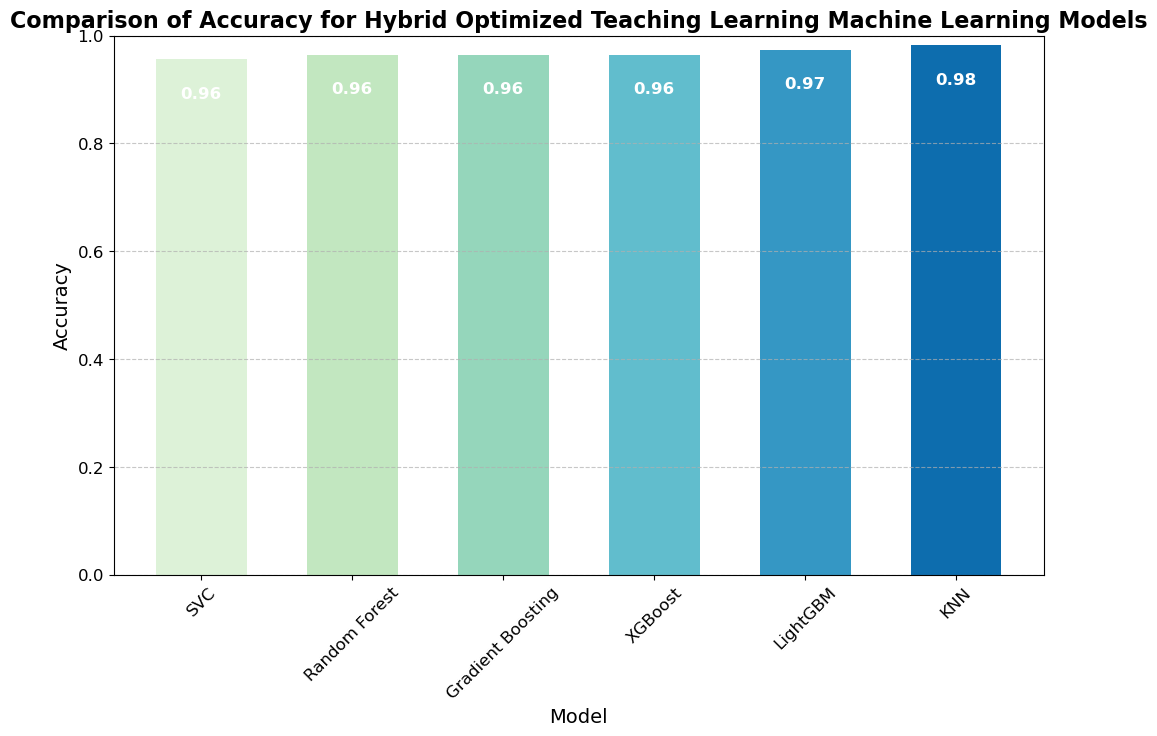

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Models and their accuracies
models = [ 'SVC', 'Random Forest', 'KNN', 'Gradient Boosting', 'XGBoost', 'LightGBM']
accuracies = [1 - best_fitness_svc, 1 - best_fitness_rf, 1 - best_fitness_knn, 1 - best_fitness_gb, 1 - best_fitness_xgb, 1 - best_fitness_lgb]

# Sorting models and accuracies by accuracy value
sorted_indices = np.argsort(accuracies)
models_sorted = np.array(models)[sorted_indices]
accuracies_sorted = np.array(accuracies)[sorted_indices]

# Create a color palette (gradient) based on accuracy values
colors = sns.color_palette("GnBu", len(models))

plt.figure(figsize=(12, 7))
bars = plt.bar(models_sorted, accuracies_sorted, color=colors, width=0.6)

# Add accuracy labels inside each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height - 0.05,
             f'{height:.2f}', ha='center', va='top', fontsize=12, color='white', fontweight='bold')

# Enhance title, labels, and overall appearance
plt.title('Comparison of Accuracy for Hybrid Optimized Teaching Learning Machine Learning Models', fontsize=16, fontweight='bold')
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Model', fontsize=14)
plt.grid(True, linestyle='--', axis='y', alpha=0.7)
plt.ylim(0, 1)  # Set y-axis limits to focus on accuracy range
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

plt.show()


In [30]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import joblib  # For saving the model

# Assuming X_train_combined and y_train_combined are already defined and scaled
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_combined_scaled, y_train_combined_class)

# Get feature importances
feature_importances = rf_model.feature_importances_
features = X_combined.columns  # Assuming 'X_combined' contains original features

# Create a DataFrame to store feature importance
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display top features
print(feature_importance_df.head(10))


best_model = tlbo_lgb  # You can replace this with the actual best model
joblib.dump(best_model, 'best_model_rf.pkl')

print("Best model saved as 'best_model_rf.pkl'")


      Feature  Importance
14         G2    0.347010
13         G1    0.208565
12   absences    0.036822
5    failures    0.028920
0         age    0.021923
8       goout    0.021913
1        Medu    0.021356
7    freetime    0.018551
10       Walc    0.018337
4   studytime    0.017598
Best model saved as 'best_model_rf.pkl'


In [31]:
import joblib

# Save the trained LightGBM model to a file using joblib
joblib.dump(tlbo_lgb , 'tlbo_lgb.joblib')

# Confirmation message
print("Best tlbo_lgb model saved successfully as 'tlbo_lgb.joblib'.")

Best tlbo_lgb model saved successfully as 'tlbo_lgb.joblib'.


In [32]:
import joblib
import lightgbm as lgb

# Assuming `tlbo_lgb` was created using HybridTLBO and we now load it
model = tlbo_lgb  # After loading or training HybridTLBO

# Extract LightGBM component
lgb_model = model.best_estimator_ if hasattr(model, 'best_estimator_') else model

# Save only the LightGBM part
joblib.dump(lgb_model, 'lgb_only_model.joblib')


['lgb_only_model.joblib']